# **NBA MVP Prediction

Data wrangling**

Welcome to the first phase of the NBA MVP Prediction project. The goal of this project is to develop and train a model that can be updated at the start of each NBA season to predict who will the NBA MVP award. In this first notebook, the data needed to complete this project is collected. A precleaned dataset is being used as the base data for this project, but this notebook will explore the data further, make changes and add features that are vital to returning accurate predictions. In addition to the code, this notebook will also summarize and explain what's in the dataset and what each step does to prepare the data for the next steps.


In [39]:
#Import libraries needed for project
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns




In [2]:
os.chdir("C:/Users/bartl/Desktop/Data-Science-/Capstone 2/data")

In [3]:
#Variable used to store the .csv file
NBA_DATA = 'NBA_Dataset.csv'

In [4]:
#Creating the NBA dataframe
df = pd.read_csv(NBA_DATA)

In [5]:
#Accessing the dataframe to view what all it entails
df.head()

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,...,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,...,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,...,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768


In [6]:
#Changing column 'g' to 'gp', 'g' stands for games which may be confusing as 'gs' stands for games started
#'gp' will be a better name as it shows the total games played in a season for a player

df.rename(columns={'g':'gp'})


,season,player,pos,age,team_id,gp,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,...,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,...,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,...,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17692,2022,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.2,0.126,0.1,2.1,2.2,0.9,0.000,0.00,0.00,0.500
17693,2022,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,10.0,0.181,7.1,-2.0,5.2,4.8,0.000,1.56,1.55,0.524
17694,2022,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,2.1,0.145,-1.4,0.4,-1.0,0.2,0.000,4.45,4.23,0.646
17695,2022,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.1,0.143,-1.2,-1.0,-2.1,0.0,0.000,-8.88,-8.55,0.329


In [7]:
#Checking data types of each column in the dataframe
df.dtypes

season                int64
player               object
pos                  object
age                   int64
team_id              object
g                     int64
gs                    int64
mp_per_g            float64
fg_per_g            float64
fga_per_g           float64
fg_pct              float64
fg3_per_g           float64
fg3a_per_g          float64
fg3_pct             float64
fg2_per_g           float64
fg2a_per_g          float64
fg2_pct             float64
efg_pct             float64
ft_per_g            float64
fta_per_g           float64
ft_pct              float64
orb_per_g           float64
drb_per_g           float64
trb_per_g           float64
ast_per_g           float64
stl_per_g           float64
blk_per_g           float64
tov_per_g           float64
pf_per_g            float64
pts_per_g           float64
mp                    int64
per                 float64
ts_pct              float64
fg3a_per_fga_pct    float64
fta_per_fga_pct     float64
orb_pct             

In [8]:
#Getting dataframe info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17697 entries, 0 to 17696
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            17697 non-null  int64  
 1   player            17697 non-null  object 
 2   pos               17697 non-null  object 
 3   age               17697 non-null  int64  
 4   team_id           17697 non-null  object 
 5   g                 17697 non-null  int64  
 6   gs                17697 non-null  int64  
 7   mp_per_g          17697 non-null  float64
 8   fg_per_g          17697 non-null  float64
 9   fga_per_g         17697 non-null  float64
 10  fg_pct            17634 non-null  float64
 11  fg3_per_g         17697 non-null  float64
 12  fg3a_per_g        17697 non-null  float64
 13  fg3_pct           15074 non-null  float64
 14  fg2_per_g         17697 non-null  float64
 15  fg2a_per_g        17697 non-null  float64
 16  fg2_pct           17591 non-null  float6

Once the data is imported and converted to a dataframe, the data was then reviewed in order to understand what all is contains, what may be useful and what may be a limiting factor

In [9]:
#Filling in blank rows with 0 instead of NaN
df.fillna(0)

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,...,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,...,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,...,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17692,2022,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.2,0.126,0.1,2.1,2.2,0.9,0.000,0.00,0.00,0.500
17693,2022,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,10.0,0.181,7.1,-2.0,5.2,4.8,0.000,1.56,1.55,0.524
17694,2022,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,2.1,0.145,-1.4,0.4,-1.0,0.2,0.000,4.45,4.23,0.646
17695,2022,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.1,0.143,-1.2,-1.0,-2.1,0.0,0.000,-8.88,-8.55,0.329


In [10]:
#Viewing summary statistics on the dataset
df.describe()

,season,age,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,fg3_per_g,fg3a_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
count,17697.000000,17697.000000,17697.000000,17697.000000,17697.000000,17697.000000,17697.000000,17634.000000,17697.000000,17697.000000,...,17697.000000,17694.000000,17697.000000,17697.000000,17697.000000,17697.000000,17697.000000,17697.000000,17697.000000,17697.000000
mean,2003.785839,26.649489,53.476804,26.040007,20.405086,3.182483,6.992716,0.442370,0.477657,1.383031,...,2.661344,0.072368,-1.489648,-0.187676,-1.677589,0.637345,0.006022,0.000402,0.001414,0.500097
std,11.658168,4.107072,25.293578,29.388891,10.111089,2.274591,4.707025,0.093417,0.656515,1.737237,...,3.016477,0.100344,3.985115,1.795641,4.958036,1.370952,0.059277,4.414384,4.264058,0.145315
min,1982.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.100000,-2.519000,-68.900000,-31.100000,-92.100000,-2.600000,0.000000,-15.200000,-14.680000,0.106000
25%,1994.000000,23.000000,34.000000,1.000000,12.000000,1.400000,3.300000,0.405000,0.000000,0.000000,...,0.300000,0.038000,-3.200000,-1.000000,-3.500000,-0.100000,0.000000,-2.820000,-2.620000,0.402000
50%,2004.000000,26.000000,61.000000,11.000000,19.800000,2.600000,5.900000,0.446000,0.100000,0.600000,...,1.700000,0.081000,-1.300000,-0.200000,-1.400000,0.100000,0.000000,0.000000,0.000000,0.500000
75%,2014.000000,29.000000,76.000000,52.000000,28.900000,4.500000,9.800000,0.488000,0.800000,2.300000,...,4.100000,0.119000,0.400000,0.700000,0.500000,1.000000,0.000000,3.020000,2.840000,0.610000
max,2022.000000,44.000000,85.000000,83.000000,43.700000,13.400000,27.800000,1.000000,5.300000,13.200000,...,21.200000,2.712000,199.400000,60.700000,242.200000,12.500000,1.000000,12.240000,11.800000,0.890000


In [11]:
df['player'].value_counts().head()

Eddie Johnson    23
Vince Carter     22
Mike Dunleavy    21
Dirk Nowitzki    21
Kevin Willis     21
Name: player, dtype: int64

The first major step in this project is to first find out what players won the MVP award for each season present in the dataset, after confirming the winners and runnerups in each season, the notebook will explore each statistical category and begin to understand what stats are most important in the MVP award share.

In [12]:
#Creating a new dataframe containing MVP award_share, player and season 
# this will help to determine historical winners of the award
df_mvp_raw = df[['season', 'player', 'award_share']]


In [13]:
df_mvp_raw.head()

,season,player,award_share
0,1982,Kareem Abdul-Jabbar,0.045
1,1982,Alvan Adams,0.000
2,1982,Mark Aguirre,0.000
3,1982,Danny Ainge,0.000
4,1982,Tiny Archibald,0.000


In [14]:
#Removing players from the data frame that received less than 45% of the votes
df_mvp_raw.drop(df_mvp_raw[df_mvp_raw['award_share'] < 0.450].index, inplace=True)

C:\Users\bartl\AppData\Local\Temp\ipykernel_38048\650258339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mvp_raw.drop(df_mvp_raw[df_mvp_raw['award_share'] < 0.450].index, inplace=True)


45% was chosen as the cutoff point in order to capture winners, anyone in a single season with at least 51% of the vote, and also potential runnerups or players that may have been outliers in the MVP award share.

In [15]:
df_mvp_raw.head()   

,season,player,award_share
14,1982,Larry Bird,0.588
186,1982,Moses Malone,0.735
331,1983,Larry Bird,0.485
493,1983,Moses Malone,0.960
647,1984,Larry Bird,0.858


In [16]:
#Grouping the raw mvp data into winners by season
top_mvp_share = df_mvp_raw.groupby(['season'])['award_share'].max()

In [17]:
#Converting back to dataframe
top_mvp_share = pd.DataFrame(top_mvp_share)

In [18]:
top_mvp_share.head()

,award_share
season,
1982,0.735
1983,0.960
1984,0.858
1985,0.978
1986,0.981


In [19]:
#Merging the MVP winners back into raw mvp data 
# in order to get the names of winners
mvp_data = top_mvp_share.merge(df_mvp_raw, on=['season', 'award_share'])

In [20]:
#Merging MVP winners into base dataframe 
# in order to split data into set with just the winners by season
mvp_stats = mvp_data.merge(df, on=['season', 'award_share', 'player'])


In [21]:
mvp_stats.head()

,season,award_share,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,...,dws,ws,ws_per_48,obpm,dbpm,bpm,vorp,mov,mov_adj,win_loss_pct
0,1982,0.735,Moses Malone,C,26,HOU,81,81,42.0,11.7,...,3.7,15.4,0.218,6.2,-1.8,4.5,5.5,-0.04,-0.39,0.561
1,1983,0.960,Moses Malone,C,27,PHI,78,78,37.5,8.4,...,6.0,15.1,0.248,4.0,-0.3,3.7,4.2,7.67,7.53,0.793
2,1984,0.858,Larry Bird,PF,27,BOS,79,77,38.3,9.6,...,5.6,13.6,0.215,5.6,2.0,7.6,7.3,6.56,6.42,0.756
3,1985,0.978,Larry Bird,SF,28,BOS,80,77,39.5,11.5,...,5.2,15.7,0.238,6.8,2.0,8.8,8.7,6.65,6.47,0.768
4,1986,0.981,Larry Bird,SF,29,BOS,82,81,38.0,9.7,...,6.2,15.8,0.244,6.6,2.1,8.7,8.4,9.41,9.06,0.817


After finding the max award share per season, this data is then joined with the cleaned dataframe as a new dataframe containing all statistical categories for each mvp winner in every season. Now that each award winner is known along with their stats, the next step is to find out what statistical categories correlate the most to the award share.

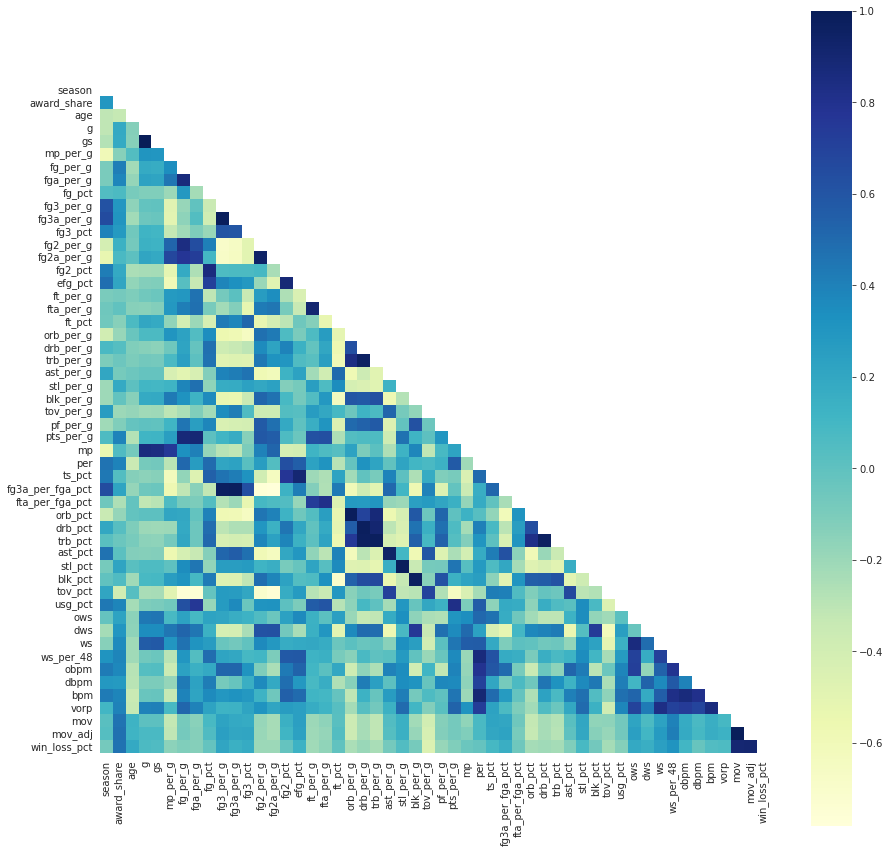

In [41]:
#Creating a heatmap based on correlation in dataframe 
# Heatmap is to see what stats correlate most closely with award_share for mvp voting

mvp_matrix = mvp_stats.corr()
map = np.zeros_like(mvp_matrix)
map[np.triu_indices_from(map)] = True
with sns.axes_style('white'):
    f,ax = plt.subplots(figsize=(15,15))
    ax = sns.heatmap(mvp_matrix, mask=map, vmax=1, square=True, cmap="YlGnBu")


Based on this heatmap generated with Seaborn, the datapoints most closely correlated to the award_share in the mvp_stats dataframe are:
win_loss_pct, mov_adj, mov, vorp, bpm, dbpm, ws_per_48, ws, dws, ows, usg_pct, per, pts_per_g, stl_per_g, efg_pct, fg2_pct, fga_per_g, fg_per_g, gs, g

Any column with fg3 "field goal attempts from three" that may be correlated to award_share will be omitted from the test sets. This is due to the fact that a portion of the mvp winners don't have any field goal attempts from three as the three point line wasn't always apart of the NBA

In [42]:
mvp_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
season,41.0,2002.000000,11.979149,1982.000,1992.000,2002.000,2012.000,2022.000
award_share,41.0,0.896463,0.086480,0.691,0.857,0.922,0.969,1.000
age,41.0,27.634146,2.799608,22.000,26.000,27.000,29.000,35.000
g,41.0,77.341463,6.578791,49.000,76.000,80.000,81.000,82.000
gs,41.0,77.195122,6.543010,49.000,76.000,79.000,81.000,82.000
mp_per_g,41.0,37.363415,2.548015,30.400,36.200,37.600,38.900,42.000
fg_per_g,41.0,9.778049,1.529953,5.700,8.800,10.000,10.700,13.000
fga_per_g,41.0,19.258537,2.995495,11.400,17.300,19.600,21.100,25.500
fg_pct,41.0,0.509390,0.038114,0.420,0.493,0.508,0.530,0.583
fg3_per_g,41.0,1.085366,1.133482,0.000,0.100,0.900,1.400,5.100


In [52]:
#Splitting out categories that correlate the most to award_share
mvp_contri = mvp_stats[['win_loss_pct', 'mov_adj', 'mov', 'vorp', 'bpm', 'dbpm', 'ws_per_48', 'ws', 'dws', 'ows', 'usg_pct', 'per', 'pts_per_g', 'stl_per_g', 'efg_pct', 'fg2_pct', 'fga_per_g', 'fg_per_g', 'gs', 'g', 'award_share']]

In [53]:
mvp_contri.head()

,win_loss_pct,mov_adj,mov,vorp,bpm,dbpm,ws_per_48,ws,dws,ows,...,per,pts_per_g,stl_per_g,efg_pct,fg2_pct,fga_per_g,fg_per_g,gs,g,award_share
0,0.561,-0.39,-0.04,5.5,4.5,-1.8,0.218,15.4,3.7,11.7,...,26.8,31.1,0.9,0.519,0.520,22.5,11.7,81,81,0.735
1,0.793,7.53,7.67,4.2,3.7,-0.3,0.248,15.1,6.0,9.1,...,25.1,24.5,1.1,0.501,0.502,16.7,8.4,78,78,0.960
2,0.756,6.42,6.56,7.3,7.6,2.0,0.215,13.6,5.6,7.9,...,24.2,24.2,1.8,0.497,0.504,19.5,9.6,77,79,0.858
3,0.768,6.47,6.65,8.7,8.8,2.0,0.238,15.7,5.2,10.5,...,26.5,28.7,1.6,0.538,0.529,22.0,11.5,77,80,0.978
4,0.817,9.06,9.41,8.4,8.7,2.1,0.244,15.8,6.2,9.6,...,25.6,25.8,2.0,0.521,0.506,19.6,9.7,81,82,0.981


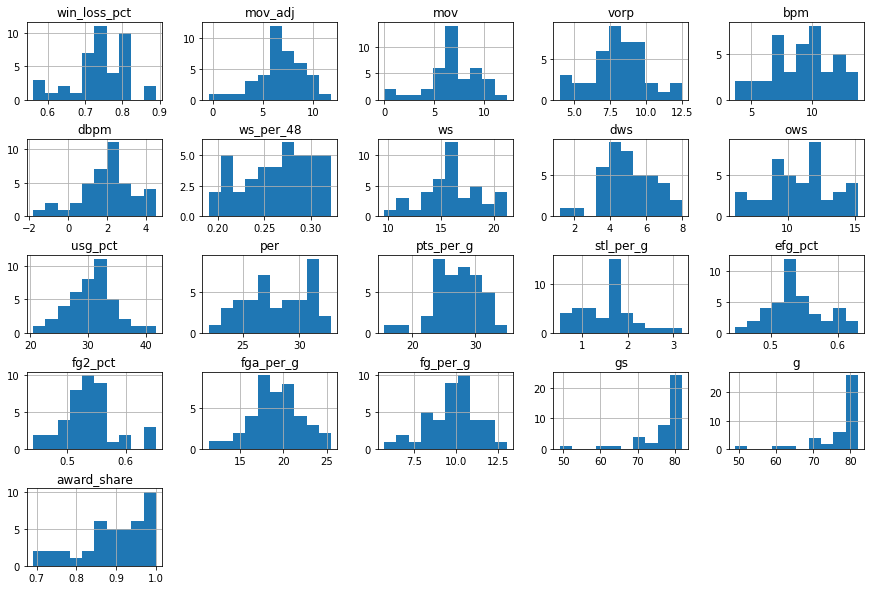

In [54]:
#Using subplots to view each category for analysis
mvp_contri.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

<AxesSubplot:xlabel='per', ylabel='award_share'>

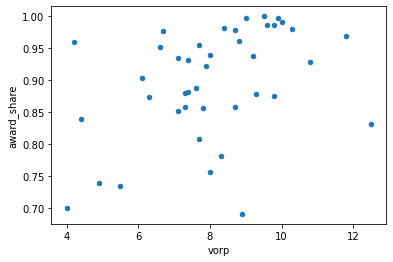

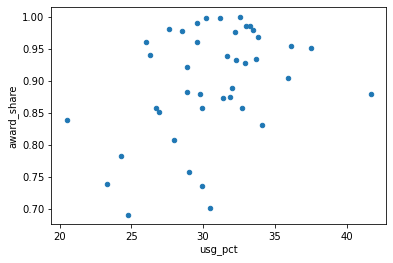

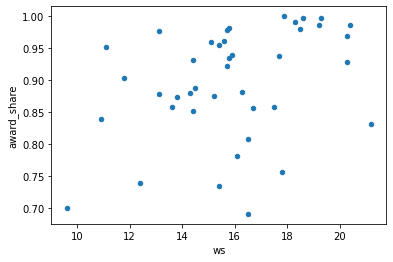

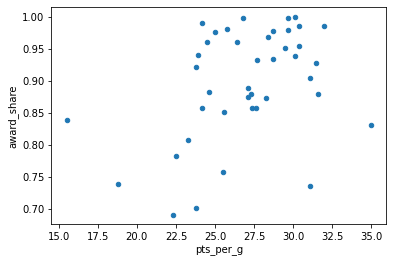

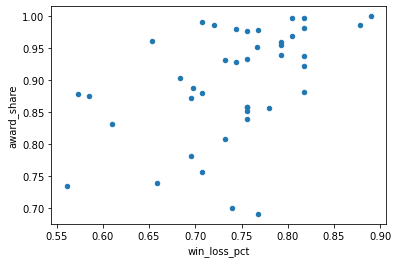

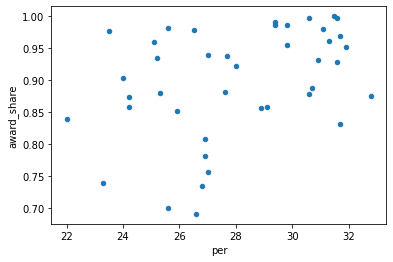

In [57]:
#Viewing key datapoints to award_share one by one
mvp_contri.plot(x='vorp', y='award_share', kind='scatter')
mvp_contri.plot(x='usg_pct', y='award_share', kind='scatter')
mvp_contri.plot(x='ws', y='award_share', kind='scatter')
mvp_contri.plot(x='pts_per_g', y='award_share', kind='scatter')
mvp_contri.plot(x='win_loss_pct', y='award_share', kind='scatter')
mvp_contri.plot(x='per', y='award_share', kind='scatter')

In [56]:
mvp_stats.median()

C:\Users\bartl\AppData\Local\Temp\ipykernel_38048\893825636.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mvp_stats.median()


season              2002.000
award_share            0.922
age                   27.000
g                     80.000
gs                    79.000
mp_per_g              37.600
fg_per_g              10.000
fga_per_g             19.600
fg_pct                 0.508
fg3_per_g              0.900
fg3a_per_g             2.400
fg3_pct                0.332
fg2_per_g              8.700
fg2a_per_g            16.200
fg2_pct                0.531
efg_pct                0.532
ft_per_g               6.400
fta_per_g              8.100
ft_pct                 0.832
orb_per_g              1.700
drb_per_g              6.800
trb_per_g              8.000
ast_per_g              5.900
stl_per_g              1.600
blk_per_g              0.800
tov_per_g              3.200
pf_per_g               2.500
pts_per_g             27.300
mp                  2979.000
per                   27.700
ts_pct                 0.600
fg3a_per_fga_pct       0.141
fta_per_fga_pct        0.429
orb_pct                5.300
drb_pct       

In [30]:
#Saving dataframe to CSV for later use
mvp_stats.to_csv(r'C:/Users/bartl/Desktop/Data-Science-/Capstone 2/data/mvp_stats.csv')

In [31]:
#Saving dataframe to CSV for later use
df.to_csv(r'C:/Users/bartl/Desktop/Data-Science-/Capstone 2/data/df.csv')

In [32]:
#Saving dataframe to CSV for later use
mvp_contri.to_csv(r'C:/Users/bartl/Desktop/Data-Science-/Capstone 2/data/mvp_contri.csv')

Now that we know what statistical categories correlate most closely to the award share, each stat can be further examined and then compared across all winners to get a better understanding of just how important that stat is to a players chances of winning the award. 

This notebook was responsible for importing the data, cleaning the data and beginning to organize and prepare the data for modeling and trainning. 